In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import pandas as pd
import seaborn as sns
import re
from scipy import interpolate

In [5]:
df=pd.read_csv('combined.csv')
x=df.X.values.reshape(int(df.shape[0]/200),200)
y=df.Y.values.reshape(int(df.shape[0]/200),200)
z_max_global=df.iloc[:,2:].max().max()
phi_1=[];phi_2=[]
for k in range(2,df.shape[1]):
    a=re.findall('(?<=-)\d+.\d+',df.columns[k])
    if a[0] not in phi_1:
        phi_1.append(a[0])
    if a[1] not in phi_2:
        phi_2.append(a[1])
phi_1.remove('0.5')
phi_1.remove('5.0')
phi_2.remove('0.5')
phi_2.remove('5.0')
r=len(phi_1)
c=len(phi_2)
font = {'size'   :'10'}
plt.rc('font', **font)

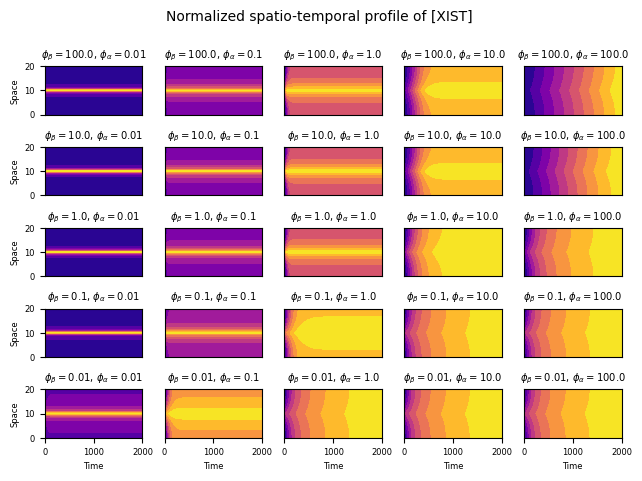

In [12]:
#--------------------------------------------
#            normalized plot
#--------------------------------------------
font = {'size'   :'6'}
plt.rc('font', **font)
fig, axs = plt.subplots(r,c)
k=2
N=10
for i,p1 in enumerate(phi_1[::-1]):
    for j,p2 in enumerate(phi_2):
        z=df[f'phi1-{p1}-phi2-{p2}'].values.reshape(int(df.shape[0]/200),200)
        z=z/np.max(z)
        cs=axs[i,j].contourf(x,y,z,N,cmap='plasma')
        axs[i,j].set_title(r"$\phi_\beta=$"+p1+r", $\phi_\alpha=$"+p2)
        if j!=0:
            axs[i,j].set_yticks([])
        else:
            axs[i,j].set_yticks([0,10,20])
            axs[i,j].set_ylabel("Space")
        if i!=r-1:
            axs[i,j].set_xticks([])
        else:
            axs[i,j].set_xlabel("Time")
fig.suptitle('Normalized spatio-temporal profile of [XIST] \n', fontsize='10.0')
plt.tight_layout()
plt.savefig('plot-phi-scan-norm.png',dpi=600)

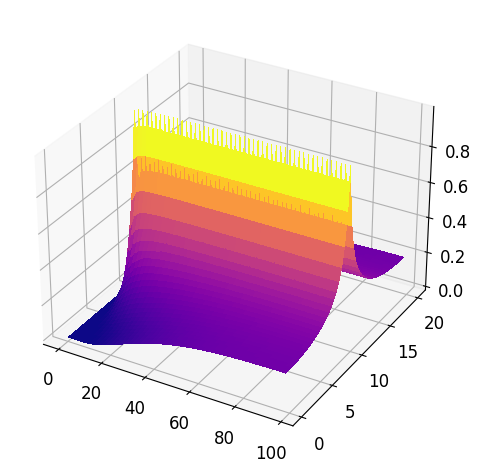

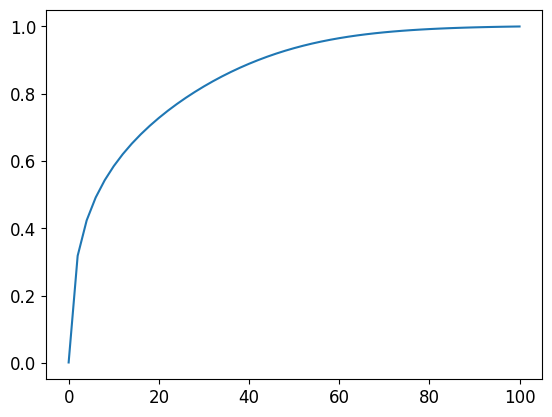

In [78]:
font = {'size'   :'12'}
plt.rc('font', **font)
# file='phi1_0.1_phi2_1.0'
file='phi1_0.01_phi2_0.01'
df_1=pd.read_csv(f'single_surface/{file}.dat',sep='\s+',header=None)
x=df_1.iloc[:,0].values.reshape(int(df.shape[0]/200),200)
y=df_1.iloc[:,1].values.reshape(int(df.shape[0]/200),200)
z=df_1.iloc[:,2].values.reshape(int(df.shape[0]/200),200)
z=z/np.max(z)
fig_0,fig= plt.subplots(subplot_kw={"projection": "3d"})
n_time=50
x_new,y_new,z_new=x[:n_time,:], y[:n_time,:], z[:n_time,:]
fig.plot_surface(x_new,y_new,z_new, cmap='plasma',
                       linewidth=0, antialiased=False)
# fig.set_xlabel('Time',size=20,rotation=-20)
# fig.set_ylabel('Space',size=20)
# fig.set_zlabel('Normalized Xist concentration',size=20)
plt.tight_layout()
plt.savefig(f'{file}_surface.png',dpi=600)
# # fig.set_title(fr"$\phi_\beta=${p1}, $\phi_\alpha=${p2}")
plt.show()
z_avg=np.average(z[:51,:],axis=1)
# len(z_avg)
plt.plot(x[:51,0],z_avg/np.max(z_avg))
plt.show()

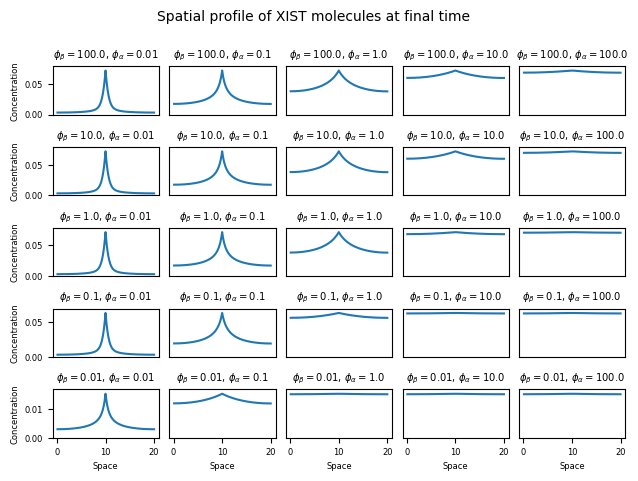

In [27]:
#---------------------------------------------
# spread of xist at final timepoint with vmax
#---------------------------------------------
font = {'size'   :'6'}
plt.rc('font', **font)
fig, axs = plt.subplots(r,c)
for i,p1 in enumerate(phi_1[::-1]):
    for j,p2 in enumerate(phi_2):
        z=df[f'phi1-{p1}-phi2-{p2}'].values.reshape(int(df.shape[0]/200),200)
        cs=axs[i,j].plot(y[-1],z[-1])
        axs[i,j].set_ylim([0,1.1*np.max(z[-1])])
        axs[i,j].set_title(r"$\phi_\beta=$"+p1+r", $\phi_\alpha=$"+p2)
        if (j!=0):
            axs[i,j].set_yticks([])
        else:
            axs[i,j].set_ylabel("Concentration", fontsize='6')
        if i!=r-1:
            axs[i,j].set_xticks([])
        else:
            axs[i,j].set_xlabel("Space", fontsize='6')
fig.suptitle('Spatial profile of XIST molecules at final time \n', fontsize='10.0')
plt.tight_layout()
plt.savefig('plot-final-time-spread-w-bottom-0.png',dpi=600)

# Bubble plot

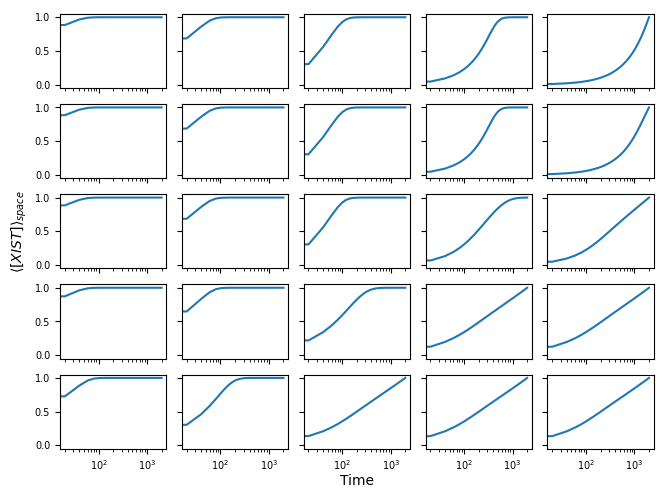

/tmp/ipykernel_3464583/379563335.py:75: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mappable=cm.ScalarMappable(norm=None,cmap=None))


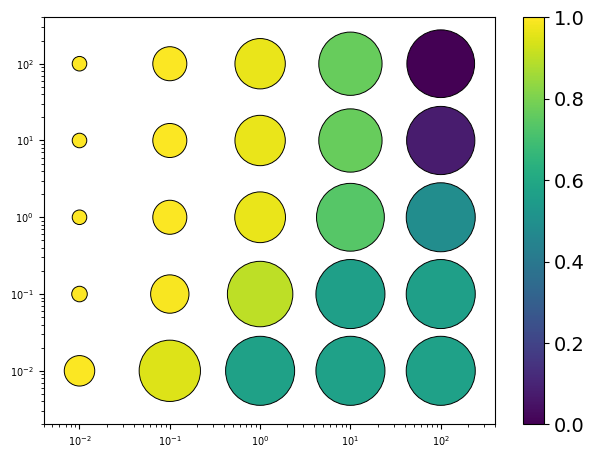

In [167]:
df=pd.read_csv('combined.csv')
x=df.X.values.reshape(int(df.shape[0]/200),200)
y=df.Y.values.reshape(int(df.shape[0]/200),200)
z_max_global=df.iloc[:,2:].max().max()
phi_1=[];phi_2=[]
for k in range(2,df.shape[1]):
    a=re.findall('(?<=-)\d+.\d+',df.columns[k])
    if a[0] not in phi_1:
        phi_1.append(a[0])
    if a[1] not in phi_2:
        phi_2.append(a[1])
font = {'size'   :'7'}
plt.rc('font', **font)
phi_1.remove('0.5')
phi_1.remove('5.0')
phi_2.remove('0.5')
phi_2.remove('5.0')
r=len(phi_1)
c=len(phi_2)
fig_1,axs_1=plt.subplots(r,c,sharex=True,sharey=True)
#-----------------------------------------------
# bubble plot
#-----------------------------------------------
phi_1_float=[float(i) for i in phi_1]
phi_2_float=[float(i) for i in phi_2]
xy_bubble=np.meshgrid(phi_2_float,phi_1_float)
bubble_size=np.ones([len(phi_2),len(phi_1)])
bubble_color=np.ones([len(phi_2),len(phi_1)])
k=0
for i,p1 in enumerate(phi_1):
    for j,p2 in enumerate(phi_2):
        z=df[f'phi1-{p1}-phi2-{p2}'].values.reshape(int(df.shape[0]/200),200)
        bubble_size[i,j]=min(z[-1])/max(z[-1])
        z_norm=z-min(z.flatten())
        z_norm=z_norm/max(z_norm.flatten())
        z_norm_avg=np.average(z_norm,axis=1)
        z_norm_avg=z_norm_avg/np.max(z_norm_avg)
        bubble_color[i,j]=np.sum(z_norm_avg)
        axs_1[r-1-i,j].plot(x[:,0],z_norm_avg)
        axs_1[r-1-i,j].set_xscale('log')
        # axs_1[r-1-i,j].set_title(f'phi1-{p1}-phi2-{p2}')
        # axs_1.flat[k].set_yscale('log')
        k+=1
        plt.tight_layout()
        # break
    # break
# bubble_color=bubble_color-min(bubble_color.flatten())
# bubble_color=bubble_color/max(bubble_color.flatten())
fig_1.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel(r"$\langle[XIST]\rangle_{space}$",size='10')
plt.xlabel("Time",size='10')
plt.show()
# bubble_color=np.log(1+bubble_color)
#-----------------------------------------------
#                Scatterplot
#-----------------------------------------------
if 1:
    fig,ax=plt.subplots()
    font = {'size'   :'14'}
    plt.rc('font', **font)
    ax.scatter(
        x = xy_bubble[0].flatten(), 
        y = xy_bubble[1].flatten(), 
        s=2500*bubble_size, 
        c=(bubble_color), 
        cmap='viridis', 
        alpha=1, 
        edgecolors="black", 
        linewidth=0.7)
    ax.set_xscale('log')
    ax.set_yscale('log')
    # plt.ylabel(r'$\phi_\beta$',size=15)
    # plt.xlabel(r'$\phi_\alpha$',size=15)
    plt.colorbar(mappable=cm.ScalarMappable(norm=None,cmap=None))
    plt.tight_layout()
    plt.xlim(4e-3,400)
    plt.ylim(2e-3,400)
    # plt.ylim(4e-2,400)
    plt.savefig('bubble_phi.png',dpi=600)
    plt.show()

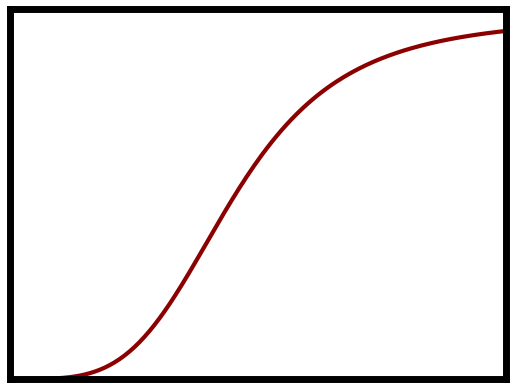

In [ ]:
x=np.linspace(0,2,200)
n=4
k=0.9
y=x**n/(k**n+x**n)
fig,ax=plt.subplots()
ax.plot(x,y,lw='3',c='darkred')
ax.set_xlim(0,2)
ax.set_ylim(0,1.02)
ax.set_xticks([])
ax.set_yticks([])
plt.setp(ax.spines.values(), lw=5)
plt.show()